# Задание 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [ ]:
agg_df = df.groupby('Customer ID').agg({
    'Payment Method': lambda x: x.mode()[0],  
    'Total Price': 'sum',                   
    'Add-on Total': 'sum'                    
})

agg_df.head()

,Payment Method,Total Price,Add-on Total
Customer ID,,,
1000,Credit Card,6279.42,66.30
1002,Cash,5020.60,60.16
1003,Cash,41.50,35.56
1004,Credit Card,83.00,65.78
1005,Debit Card,11779.11,75.33


# Задание 2

In [4]:
rev_ship = df.groupby('Shipping Type')['Total Price'].sum()

rev_ship.head()

Shipping Type
Expedited    12437526.21
Express       8685215.62
Overnight     8704828.17
Same Day     12432024.82
Standard     21343073.55
Name: Total Price, dtype: float64

In [5]:
rev_by_prod = df.groupby('Product Type')['Total Price'].sum()

rev_by_prod.head()

Product Type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    21516754.69
Smartwatch    14036273.06
Tablet        11712000.41
Name: Total Price, dtype: float64

In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')

revenue_by_month = df.groupby('Month')['Add-on Total'].sum()

print(revenue_by_month)


Month
2023-09      8012.62
2023-10     37837.12
2023-11     34888.81
2023-12     33509.15
2024-01    136195.16
2024-02    120148.92
2024-03    124954.26
2024-04    123973.59
2024-05    132018.51
2024-06    126689.59
2024-07    132017.20
2024-08    135133.14
2024-09     99518.89
Freq: M, Name: Add-on Total, dtype: float64


In [7]:
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

revenue_by_quar = df.groupby("Quarter")['Add-on Total'].sum()


print(revenue_by_quar)

Quarter
2023Q3      8012.62
2023Q4    106235.08
2024Q1    381298.34
2024Q2    382681.69
2024Q3    366669.23
Freq: Q-DEC, Name: Add-on Total, dtype: float64


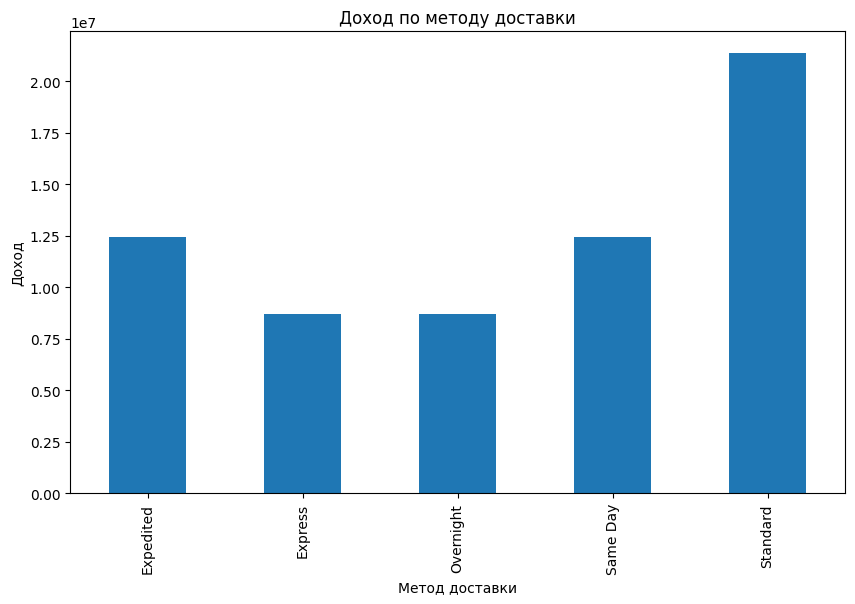

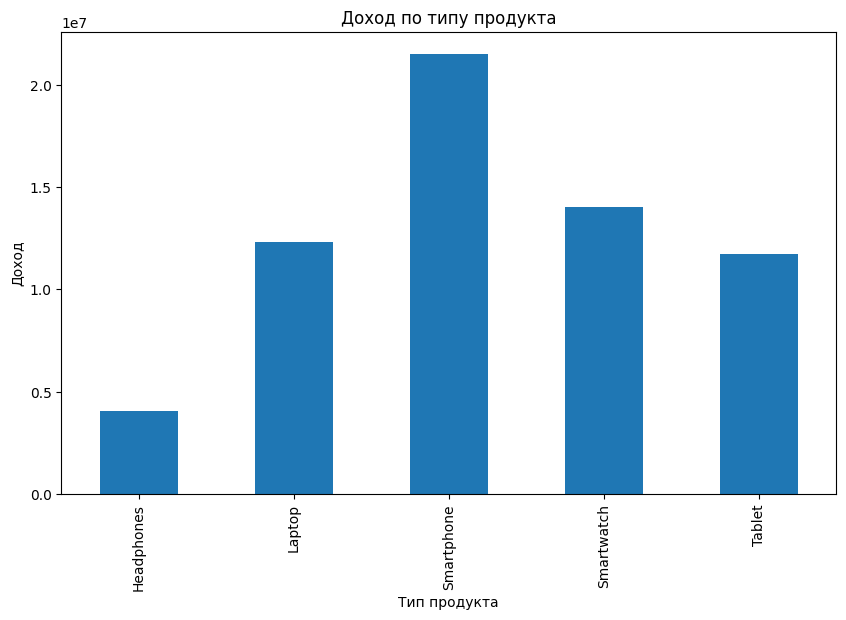

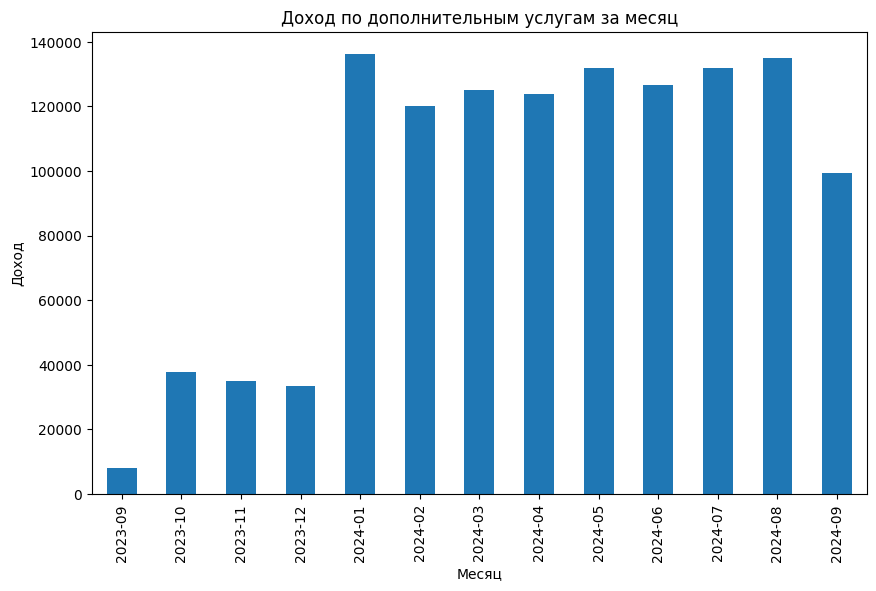

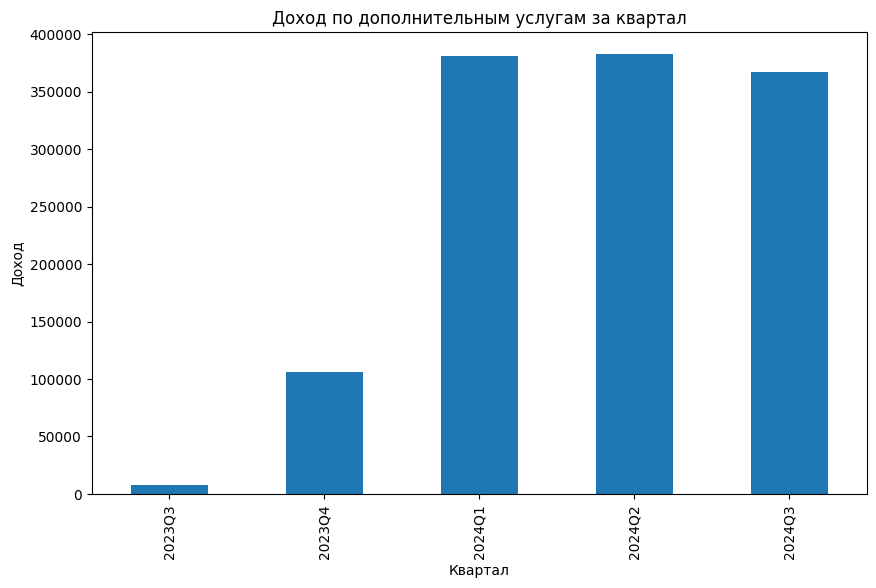

In [8]:
plt.figure(figsize=(10, 6))
rev_ship.plot(kind='bar')
plt.title('Доход по методу доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Доход')
plt.show()

plt.figure(figsize=(10, 6))
rev_by_prod.plot(kind='bar')
plt.title('Доход по типу продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Доход')
plt.show()

plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='bar')
plt.title('Доход по дополнительным услугам за месяц')
plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.show()

plt.figure(figsize=(10, 6))
revenue_by_quar.plot(kind='bar')
plt.title('Доход по дополнительным услугам за квартал')
plt.xlabel('Квартал')
plt.ylabel('Доход')
plt.show()